# Using data analysis libraries

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from my_venv.food_calories_complex import meals_complex, combos_complex

df = pd.read_json("my_venv/data/orders_history.json")
df.columns

Index(['orders'], dtype='object')

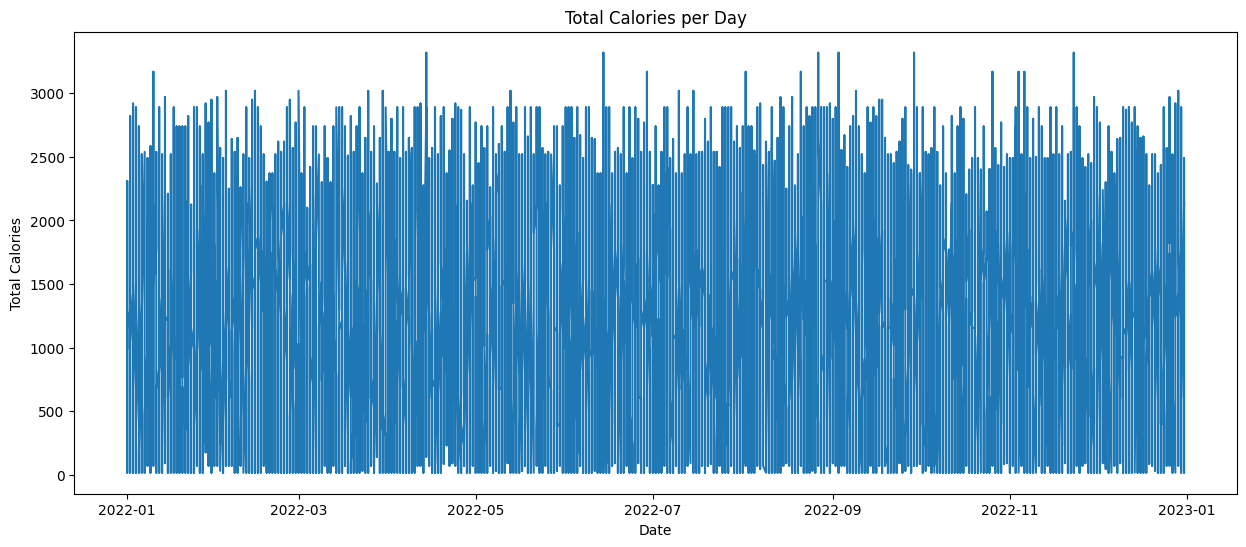

In [18]:
#Function to calculate item or combo calories 
def calculate_total_calories(items, meals_list, combos_list):
    total_calories = 0

    for item_id in items:
        meal = next((meal for meal in meals_list if meal["id"] == item_id), None)

        if meal:
            total_calories += meal["calories"]
        else:
            combo = next((combo for combo in combos_list if combo["id"] == item_id), None)

            if combo:
                for meal_id in combo["meals"]:
                    meal = next((meal for meal in meals_list if meal["id"] == meal_id), None)
                    if meal:
                        total_calories += meal["calories"]

    return total_calories

# Extract 'items' and 'date' from the 'orders' column
df[['items', 'date']] = df['orders'].apply(lambda x: pd.Series([x['items'], datetime.strptime(x['date'], '%d-%b-%Y')]))

# Calculate total calories per day
df['total_calories'] = df.apply(lambda row: calculate_total_calories(row['items'], meals_complex, combos_complex), axis=1)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['total_calories'])
plt.title('Total Calories per Day')
plt.xlabel('Date')
plt.ylabel('Total Calories')
plt.show()

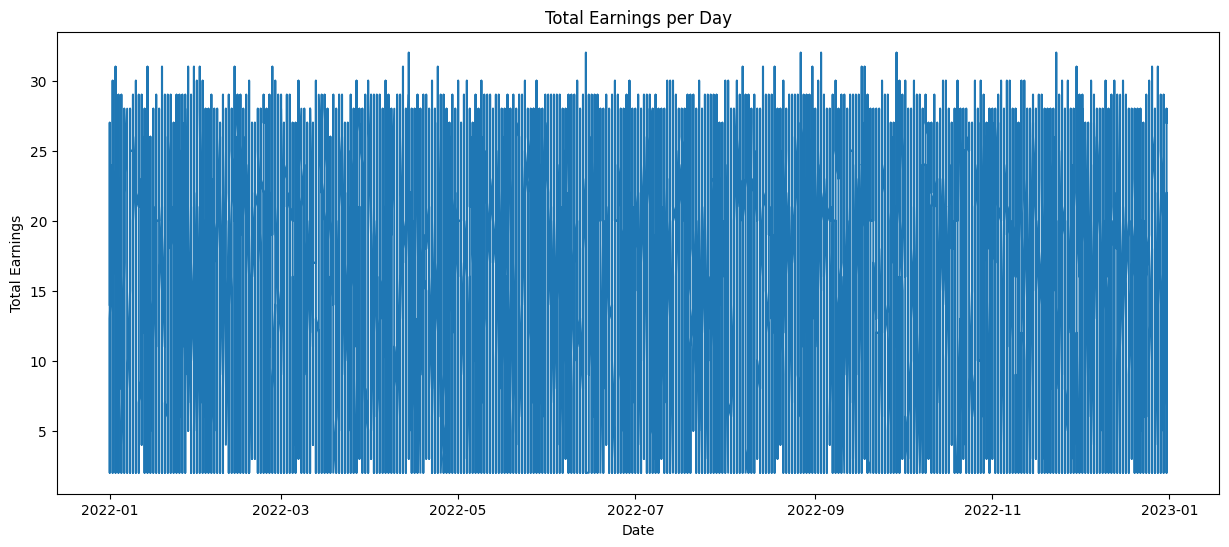

In [19]:
#Function to calculate total earnings
def calculate_total_earnings(items, meals_list, combos_list):
    total_earnings = 0

    for item_id in items:
        meal = next((meal for meal in meals_list if meal["id"] == item_id), None)

        if meal:
            total_earnings += meal["price"]
        else:
            combo = next((combo for combo in combos_list if combo["id"] == item_id), None)

            if combo:
                total_earnings += combo["price"]

    return total_earnings

# Extract 'items' and 'date' from the 'orders' column
df[['items', 'date']] = df['orders'].apply(lambda x: pd.Series([x['items'], datetime.strptime(x['date'], '%d-%b-%Y')]))

# Calculate total earnings per day
df['total_earnings'] = df.apply(lambda row: calculate_total_earnings(row['items'], meals_complex, combos_complex), axis=1)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['total_earnings'])
plt.title('Total Earnings per Day')
plt.xlabel('Date')
plt.ylabel('Total Earnings')
plt.show()

In [17]:
#Function to calculate order count in descending order 
def count_meals(orders):
    meal_counts = {}

    for order in orders:
        items = order['items']
        for item_id in items:
            meal_counts[item_id] = meal_counts.get(item_id, 0) + 1

    return meal_counts

# Extract 'items' from the 'orders' column
df['items'] = df['orders'].apply(lambda x: x['items'])

# Count the occurrences of each meal
meal_counts = count_meals(df['orders'].tolist())

# Create a DataFrame with meal counts
most_ordered_meals_df = pd.DataFrame(list(meal_counts.items()), columns=['Meal', 'Order Count'])

# Sort the DataFrame by order count in descending order
most_ordered_meals_df = most_ordered_meals_df.sort_values(by='Order Count', ascending=False)

# Display the table of most ordered meals
print("Most ordered meals: ")
print(most_ordered_meals_df)

Most ordered meals: 
       Meal  Order Count
5   combo-2        12368
3   combo-3        12348
6   combo-1        11994
9    meal-4         7094
10   meal-1         7085
0    meal-2         6992
4    meal-3         6986
1    meal-6         6944
7    meal-7         6920
2    meal-5         6848
8    meal-8         6848


In [16]:
def count_combos(orders):
    combo_counts = {}

    for order in orders:
        items = order['items']
        for item_id in items:
            if item_id.startswith('combo-'):
                combo_counts[item_id] = combo_counts.get(item_id, 0) + 1

    return combo_counts

# Extract 'items' from the 'orders' column
df['items'] = df['orders'].apply(lambda x: x['items'])

# Count the occurrences of each combo
combo_counts = count_combos(df['orders'].tolist())

# Create a DataFrame with combo counts
most_ordered_combos_df = pd.DataFrame(list(combo_counts.items()), columns=['Combo', 'Order Count'])

# Sort the DataFrame by order count in descending order
most_ordered_combos_df = most_ordered_combos_df.sort_values(by='Order Count', ascending=False)

# Display the table of most ordered combos
print("Most ordered combos: ")
print(most_ordered_combos_df)

Most ordered combos: 
     Combo  Order Count
1  combo-2        12368
0  combo-3        12348
2  combo-1        11994


In [15]:
# Function to calculate total earnings for each combo or meal
def calculate_total_earnings(items, meals_list, combos_list):
    total_earnings = 0

    for item_id in items:
        meal = next((meal for meal in meals_list if meal["id"] == item_id), None)

        if meal:
            total_earnings += meal["price"]
        else:
            combo = next((combo for combo in combos_list if combo["id"] == item_id), None)

            if combo:
                total_earnings += combo["price"]

    return total_earnings

# Extract 'items' from the 'orders' column
df['items'] = df['orders'].apply(lambda x: x['items'])

# Calculate total earnings for each combo or meal
df['total_earnings'] = df['items'].apply(lambda items: calculate_total_earnings(items, meals_complex, combos_complex))

# Find the items with the highest total earnings
max_earnings = df['total_earnings'].max()
most_profitable_items = df[df['total_earnings'] == max_earnings]['items'].tolist()

mp_items = []
for items in most_profitable_items:
    mp_items.append(items)
# Display the list of most profitable combos or meals
mp = set(mp_items[0])
print ("Combo and meal that brought the most money : " + str(mp))


Combo and meal that brought the most money : {'meal-2', 'combo-1'}
